# Aula 05 - Incerteza, Métricas de Erro e Bayes

## Objetivos Aula de hoje

* Naive Bayes (sklearn)

* Matriz de Confusão

* Visualização dos dados

* IRIS

* Train test split

* Randon Forest

* Atividade 1

In [79]:
import os, sys
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Iris dataset - Naive Bayes

In [2]:
iris = load_iris()

In [88]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.data.shape

(150, 4)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris['target']
df = df.rename(columns={"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_width",
                        "petal length (cm)": "petal_length", "petal width (cm)": "petal_width"})

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
fig = make_subplots(rows=1, cols=4)

fig.add_trace(
    go.Violin(x=df["target"], y=df["sepal_width"]),
    row=1, col=1
)

fig.add_trace(
    go.Violin(x=df["target"], y=df["sepal_length"]), 
    row=1, col=2
)

fig.add_trace(
    go.Violin(x=df["target"], y=df["petal_width"]),
    row=1, col=3
)

fig.add_trace(
    go.Violin(x=df["target"], y=df["petal_length"]), 
    row=1, col=4
)

In [26]:
px.scatter_3d(df, x='sepal_length', y='petal_length', z='petal_width',
              color='target', height=600)

## Naive Bayes

In [44]:
X_train, X_test,  y_train, y_test = train_test_split(iris.data, iris.target, random_state=42, test_size=0.33)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [48]:
classificador = GaussianNB()

In [49]:
classificador.fit(X_train, y_train)

GaussianNB()

In [50]:
classificador.score(X_train, y_train)

0.95

In [56]:
iris_predict = classificador.predict(X_test)
metrics.accuracy_score(iris_predict, y_test)

0.96

In [58]:
cm = confusion_matrix(y_test, iris_predict)
cm

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]], dtype=int64)

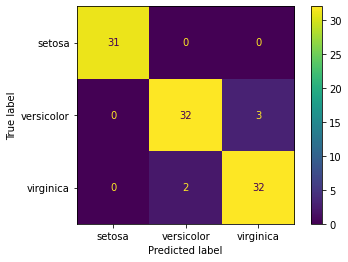

In [66]:
plot_confusion_matrix(classificador, X_train, y_train, display_labels=iris.target_names)

In [92]:
TP = 32
FP = 2
FN = 3

print(TP/(TP+FN))

0.9142857142857143


In [88]:
print(classification_report(y_test, iris_predict, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



$$ \Large Recal = \frac{TP}{TP + FN} $$

&nbsp;


$$ \Large Precision = \frac{TP}{TP + FP} $$

&nbsp;


$$ \Large F1 = 2 \cdot \frac{1}{\frac{1}{Precision} + \frac{1}{Recal}} $$